# Gradient Descent

In [1]:
import numpy as np
import pandas as pd

In [15]:
data=pd.DataFrame([[0.5,1.4],[2.3,1.9],[2.9,3.2]],columns=['Weight','Height'])
data

,Weight,Height
0,0.5,1.4
1,2.3,1.9
2,2.9,3.2


##### pred_Height= b1*Weight + b0
Therfore building the regression model is nothing but finding/optimising these coefficients.
Lets start with freezing one coefficient b1=0.64 and computing other one 'b0'

The idea of finding these coefficient is:
Compute the value for b0 and b1 such that the error is minimum.

What is error ? sum((Actual Height - Pred_Height)^2)

sum((Actual Height - (b1*Weight + b0) )^2)  --> 0

In [50]:
# Best Line Fit Equation 
b0=0
b1=0.64 
Pred_Height = b1*data['Weight']+b0

In [51]:
Pred_Height

0    0.320
1    1.472
2    1.856
Name: Weight, dtype: float64

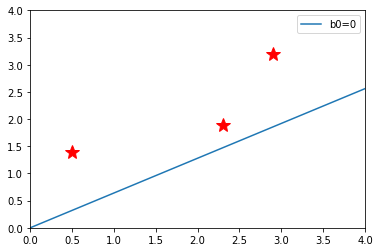

In [52]:

import seaborn as sb
from matplotlib import pyplot as plt
plt.plot(data['Weight'],data['Height'],'*',markersize=14,color='red')
plt.axis([0,4,0,4])
x=np.linspace(0,4,50)
plt.plot(x,b1*x+b0, label= 'b0=0')
plt.legend()

In [19]:
#To Compute Error

In [53]:
# Squared Error = (Pred_Height-Height)^2
er=Pred_Height-data['Height']
se=np.power(er,2)
print(se)
sse=np.sum(se)
print('The sum of squared error',sse)

0    1.166400
1    0.183184
2    1.806336
dtype: float64
The sum of squared error 3.1559200000000005


In [54]:
b0=[0,0.25,0.5,0.75,1,1.25,1.5,1.75,2]
sse=[]

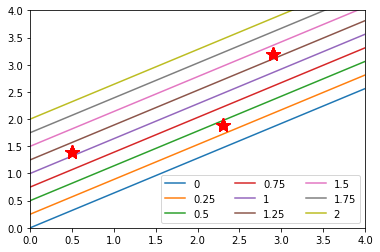

In [55]:
#plotting the best fit line for differnt b0
for i in b0:
    plt.plot(data['Weight'],data['Height'],'*',markersize=14,color='red')
    plt.axis([0,4,0,4])
    x=np.linspace(0,4,50)
    plt.plot(x,b1*x+i,label=i)
    plt.legend(ncol=3)

In [56]:
# computing the sum of square of error for each b0
for i in b0:
    Pred_Height = b1*data['Weight']+i
    er=data['Height']-Pred_Height
    se=np.power(er,2)
    sse.append(np.sum(se))
sse=pd.DataFrame(sse)
b0=pd.DataFrame(b0)

In [57]:
sse_b=pd.concat([b0,sse],axis=1)

In [58]:
sse_b.columns=['b0','sse']
sse_b

,b0,sse
0,0.00,3.15592
1,0.25,1.91742
2,0.50,1.05392
3,0.75,0.56542
4,1.00,0.45192
5,1.25,0.71342
6,1.50,1.34992
7,1.75,2.36142
8,2.00,3.74792


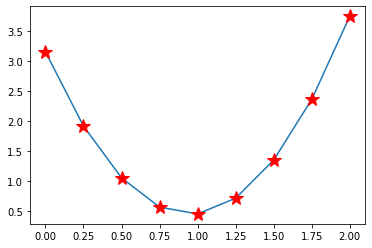

In [26]:
plt.plot(sse_b['b0'],sse_b['sse'])
plt.plot(sse_b['b0'],sse_b['sse'], '*', markersize=14, color='red')

##### Rate of change of error

sse =sum (data['Height']-Pred_Height)^2

sse =sum (data['Height']- 0.64*data['Weight']-b0)^2

rate of change of error with respect to b0 = sum 2*[(data['Height'] - 0.64*data['Weight']- b0)](-1)

                                       = sum  -2*(data['Height']-0.64*data['Weight']-b0)
                                           


In [60]:
# RAte of change of error 
b0=0
dsse=np.sum(-2*(data['Height']-0.64*data['Weight']-b0))

In [61]:
dsse

-5.704000000000001

Take Learning Rate alpha = 0.1

step_size= Rate of change of error * learning factor

         = dsse*alpha

New_b0 = previous_b0 - step_size

Now repeat the above error and rate of error calculation using new_b0


In [62]:
#learning factor
alpha=0.1
while(np.abs(dsse)>0.1):
    step_size=alpha*dsse
    b0=b0-step_size
    print('The updated coefficient is: ',b0)
    dsse=np.sum(-2*(data['Height']-0.64*data['Weight']-b0))
    print('The rate of change of sum of sqaure error: ',dsse)
print('Run the cell again and again and when differntation of error become close to zero reduce the learning factor')

The updated coefficient is:  0.5704000000000001
The rate of change of sum of sqaure error:  -2.281599999999999
The updated coefficient is:  0.79856
The rate of change of sum of sqaure error:  -0.9126399999999999
The updated coefficient is:  0.8898240000000001
The rate of change of sum of sqaure error:  -0.3650559999999998
The updated coefficient is:  0.9263296000000001
The rate of change of sum of sqaure error:  -0.14602239999999966
The updated coefficient is:  0.9409318400000001
The rate of change of sum of sqaure error:  -0.05840895999999973
Run the cell again and again and when differntation of error become close to zero reduce the learning factor


In [711]:
# As dsse is moving close to zero, the aplha value can be reduced so that we can control dsse such that
#it will not deviate on the other side


In [63]:
alpha=0.01
while(abs(dsse)>0.0001):
    step_size=alpha*dsse
    b0=b0-step_size
    print('The updated coefficient is: ',b0)
    dsse=np.sum(-2*(data['Height']-0.64*data['Weight']-b0))
    print('The rate of change of sum of sqaure error: ',dsse)

The updated coefficient is:  0.9415159296000001
The rate of change of sum of sqaure error:  -0.05490442239999971
The updated coefficient is:  0.9420649738240001
The rate of change of sum of sqaure error:  -0.05161015705599947
The updated coefficient is:  0.9425810753945602
The rate of change of sum of sqaure error:  -0.048513547632639265
The updated coefficient is:  0.9430662108708865
The rate of change of sum of sqaure error:  -0.04560273477468124
The updated coefficient is:  0.9435222382186333
The rate of change of sum of sqaure error:  -0.0428665706882001
The updated coefficient is:  0.9439509039255154
The rate of change of sum of sqaure error:  -0.040294576446907815
The updated coefficient is:  0.9443538496899845
The rate of change of sum of sqaure error:  -0.03787690186009329
The updated coefficient is:  0.9447326187085854
The rate of change of sum of sqaure error:  -0.035604287748487895
The updated coefficient is:  0.9450886615860703
The rate of change of sum of sqaure error:  -0

The rate of change of sum of sqaure error:  -0.0004981087842375054
The updated coefficient is:  0.9505886296238029
The rate of change of sum of sqaure error:  -0.00046822225718301524
The updated coefficient is:  0.9505933118463747
The rate of change of sum of sqaure error:  -0.0004401289217517146
The updated coefficient is:  0.9505977131355923
The rate of change of sum of sqaure error:  -0.0004137211864465584
The updated coefficient is:  0.9506018503474567
The rate of change of sum of sqaure error:  -0.0003888979152599781
The updated coefficient is:  0.9506057393266093
The rate of change of sum of sqaure error:  -0.0003655640403443794
The updated coefficient is:  0.9506093949670127
The rate of change of sum of sqaure error:  -0.0003436301979240497
The updated coefficient is:  0.9506128312689919
The rate of change of sum of sqaure error:  -0.00032301238604892646
The updated coefficient is:  0.9506160613928524
The rate of change of sum of sqaure error:  -0.0003036316428859376
The updated

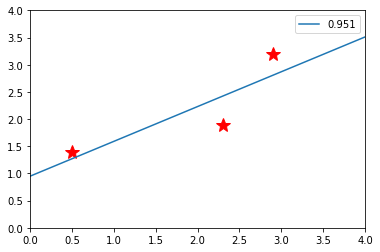

In [64]:
# Best Fit Line
plt.plot(data['Weight'],data['Height'],'*',markersize=14,color='red')
plt.axis([0,4,0,4])
x=np.linspace(0,4,50)
plt.plot(x,b1*x+b0,label=np.round(b0,3))
plt.legend()

## Gradient descent workout for tuning both b0 and b1

In [33]:
b0=np.array([0,0.25,0.5,0.75,1,1.25,1.5,1.75,2])
b1=np.array([0.1,0.3,0.45,0.6,0.75,0.9,1.3,1.6,1.8])

In [34]:
sser=[]
for i,j in zip(b0,b1):
    H_pred=i*data['Weight']+j
    er=H_pred-data['Height']
    ser=np.power(er,2)
    sser.append(np.sum(ser))
sser=np.array(sser)
sser

array([14.54    ,  6.731875,  2.27    ,  0.541875,  1.5475  ,  5.286875,
       14.5475  , 27.106875, 41.57    ])

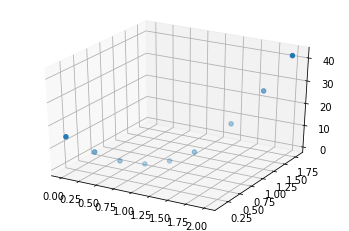

In [35]:
from mpl_toolkits.mplot3d import Axes3D
ax = plt.axes(projection='3d')
ax.scatter3D(b0,b1,sser)

In [36]:
b0=np.linspace(-10,10,30)
b1=np.linspace(-10,10,30)

In [37]:
b1.shape

(30,)

In [38]:
sser=[]
for i,j in zip(b0,b1):
    H_pred=j*data['Weight']+i
    er=H_pred-data['Height']
    ser=np.power(er,2)
    sser.append(np.sum(ser))
sser=np.array(sser)
sser

array([3.26781000e+03, 2.86150084e+03, 2.48215958e+03, 2.12978622e+03,
       1.80438075e+03, 1.50594317e+03, 1.23447350e+03, 9.89971712e+02,
       7.72437824e+02, 5.81871831e+02, 4.18273734e+02, 2.81643532e+02,
       1.71981225e+02, 8.92868133e+01, 3.35602973e+01, 4.80167658e+00,
       3.01095125e+00, 2.81881213e+01, 8.03331867e+01, 1.59446147e+02,
       2.65527004e+02, 3.98575755e+02, 5.58592402e+02, 7.45576944e+02,
       9.59529382e+02, 1.20044971e+03, 1.46833794e+03, 1.76319407e+03,
       2.08501809e+03, 2.43381000e+03])

In [39]:
sser=[]
sser1=[]
for i in b0:
    sser=[]
    for j in b1:
        H_pred=i*data['Weight']+j
        er=H_pred-data['Height']
        ser=np.power(er,2)
        #mse=np.mean(ser)
        sser.append(np.sum(ser))
        sser_ar=np.array(sser)
    sser1.append(sser)

In [770]:
#sser1=np.array(sser1)
#sser1.shape

In [40]:
B0, B1 = np.meshgrid(b0, b1)
sser1=np.array(sser1)
print(sser1.shape)
print(B0.shape)
print(B1.shape)

(30, 30)
(30, 30)
(30, 30)


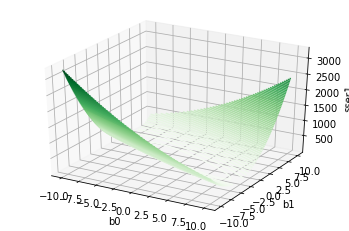

In [41]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(B0, B1, sser1,100, cmap='Greens')
ax.set_xlabel('b0')
ax.set_ylabel('b1')
ax.set_zlabel('sser1');

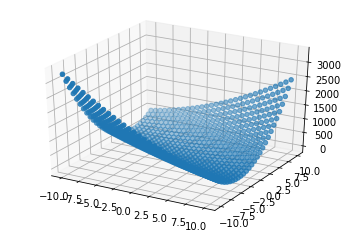

In [42]:
ax = plt.axes(projection='3d')
ax.scatter3D(B0,B1,sser1)
#ax.scatter()

In [43]:
xmin,ymin=np.where(sser1==np.min(sser1))
xmax,ymax=np.where(sser1==np.max(sser1))

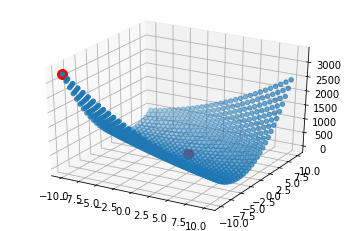

In [44]:
ax = plt.axes(projection='3d')
ax.scatter3D(B0,B1,sser1)
ax.scatter3D(b0[xmin],b1[ymin],np.min(sser1),color='red',s=100)
ax.scatter3D(b0[xmax],b1[ymax],np.max(sser1),color='red',s=100)

In [46]:
b0=0
b1=1
ssser=1
alpha=0.01
itr=0

sse = sum (actual_Height - pred_Height)^2
   
    = sum (data['Height'] - b1*data['Weight']- b0) ^2
    
dsse w.r.t to both b0 and b1

dsse_b0 = sum 2(data['Height'] - b1*data['Weight']- b0)(-1)

        =sum -2(data['Height'] - b1*data['Weight']- b0)
        
        = sum -2(data['Height'] - (b1*data['Weight']+ b0))
    
dsse_b1 = sum 2(data['Height'] - b1*data['Weight']- b0)(data['Weight']]

        =sum -2*data['weight']((data['Height'] - b1*data['Weight']-b0))
        
        = sum -2*data['weight']((data['Height'] - (b1*data['Weight']+b0)))
        
step_size_b0=dsse_b0*aplha

step_size_b1=dsse_b1*alpha

new_b0=previou_b0-step_size_b0

new_b1=previou_b1-step_size_b1

In [65]:
while (ssser>0.1):
    dsse_b0=np.sum(-2*(data['Height']-(b1*data['Weight']+b0)))
    dsse_b1=np.sum(-2*data['Weight']*(data['Height']-(b1*data['Weight']+b0)))
    step_size_b0=dsse_b0*alpha
    step_size_b1=dsse_b1*alpha
    b0=b0-step_size_b0
    b1=b1-step_size_b1
    H_pred=b1*data['Weight']+b0
    er=H_pred-data['Height']
    ser=np.power(er,2)
    sser=np.mean(ser)
    ssser=np.sqrt(sser)
    itr=itr+1
    print('The RMSE error',ssser)
    #print('The rate of change of error',dsse_b1)
    print('The feature coefficeint',b1)
    print('The intercept coefficeint',b0)
    print('Iteration: ',itr)
    if itr>1000:
        break
        

The RMSE error 0.38497545138854655
The feature coefficeint 0.6400658940960361
The intercept coefficeint 0.9506510486818074
Iteration:  1002


In [49]:
print('The tuned Coefficient b1: ', b1)
print('The tuned intercept b0: ', b0)

The tuned Coefficient b1:  0.6410296375332744
The tuned intercept b0:  0.9487085684799762


In [418]:
#sine=[]
#sin1=[]
#for i in b0:
#    sine=[]
#    for j in b1:
#        si=np.sin(np.sqrt(i ** 2 + j ** 2))
#        sine.append(si)
#    sin1.append(sine)    

In [341]:
#fig = plt.figure()
#ax = plt.axes(projection='3d')
#ax.contour3D(B0, B1, sin1,100, cmap='Greens')
#ax.set_xlabel('b0')
#ax.set_ylabel('b1')
#ax.set_zlabel('sin1');

In [342]:
#from mpl_toolkits.mplot3d import Axes3D
#ax = plt.axes(projection='3d')
#ax.scatter3D(b0,b1,sser)